In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from scipy.interpolate import *
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
FFS = "fantasystatsall.csv"
FFP = 'Scoring_System_ESPN_Classic.csv'
# Read the Mouse and Drug Data and the Clinical Trial Data
FFS_df = pd.read_csv(FFS)
FFP_df = pd.read_csv(FFP)

# Combine the data into a single dataset
# data_combine = pd.merge(mouse_data,clinical_data, how='left', on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
FFS_df=FFS_df.fillna(0)
FFS_df.head()


,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,...,Passing Interceptions,Passing Redzone Attempts,Passing Touchdowns,Passing Yards,Field Goal Attempts,Field Goal Longest,Field Goal Made,Field Goal Yards,Extra Pts Attempts,Extra Pts Made
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.0,0.0,...,16.0,5.0,24.0,3400.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,1.0,1.0,...,12.0,41.0,14.0,2454.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.0,0.0,...,8.0,38.0,17.0,2483.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.0,0.0,...,15.0,72.0,31.0,3905.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.0,0.0,...,17.0,27.0,12.0,2710.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
FFP_df.head()

,Grouping,Activity,Points
0,Passing,Passing Yards,0.04
1,Passing,Passing Touchdowns,4.00
2,Passing,Passing Interceptions,-2.00
3,Passing,2pt Pass Conversions,2.00
4,Rushing,Rush Yards,0.10


In [401]:
#stupid way
FP_Calc_DF = FFS_df

act_list = FFP_df["Activity"].tolist()
pts_list = FFP_df["Points"].tolist()


for i in range (len(act_list)): 
    if act_list[i] == "Passing Yards": 
        x = FP_Calc_DF["Passing Yards"] * pts_list[i]
        FP_Calc_DF["Passing Yards FP"] = x
    if act_list[i] == "Passing Touchdowns": 
        x = FP_Calc_DF["Passing Touchdowns"] * pts_list[i]
        FP_Calc_DF["Passing Touchdowns FP"] = x
    

FP_Calc_DF.head()



,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,...,Extra Pts Made,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.0,0.0,...,0.0,136.00,96.0,-32.0,19.7,6.0,0.0,0.0,0.0,-12.0
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,1.0,1.0,...,0.0,98.16,56.0,-24.0,22.5,18.0,0.0,1.0,0.0,-4.0
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.0,0.0,...,0.0,99.32,68.0,-16.0,18.4,12.0,0.0,0.0,0.0,-2.0
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.0,0.0,...,0.0,156.20,124.0,-30.0,27.0,12.0,0.0,0.0,0.0,-4.0
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.0,0.0,...,0.0,108.40,48.0,-34.0,13.0,0.0,0.0,0.0,0.0,-2.0


In [3]:
#better way
FP_Calc_DF2 = FFS_df

act_list = FFP_df["Activity"].tolist()
pts_list = FFP_df["Points"].tolist()


for i in range (len(act_list)): 
    try: 
        x = FP_Calc_DF2[act_list[i]] * pts_list[i]
        FP_Calc_DF2[act_list[i] + " FP"] = x
    except:
        print(act_list[i] + " not a column in FP_Calc_DF2")
        


FP_Calc_DF2.head()



2pt Pass Conversions not a column in FP_Calc_DF2
2pt Rush Conversions not a column in FP_Calc_DF2
2pt Receiving Conversions not a column in FP_Calc_DF2
PAT not a column in FP_Calc_DF2
Field Goals Missed not a column in FP_Calc_DF2
FG Made (0-39 yards) not a column in FP_Calc_DF2
FG Made (40-49 yards) not a column in FP_Calc_DF2
FG Made (50+ yards)  not a column in FP_Calc_DF2
Kickoff Return TD not a column in FP_Calc_DF2
Punt return TD not a column in FP_Calc_DF2
Interception Return TD not a column in FP_Calc_DF2
Fumble Return TD not a column in FP_Calc_DF2
Blocked Punt Return TD not a column in FP_Calc_DF2
Blocked FG Return TD not a column in FP_Calc_DF2
2pt Return not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
Sack not a column in FP_Calc_DF2
Blocked Punt, PAT, FG not a column in FP_Calc_DF2
Interception not a column in FP_Calc_DF2
Fumble Recovered not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
0 points allowed (PA0) not a column in FP_Calc_DF2
1-6 poi

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,...,Extra Pts Made,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.0,0.0,...,0.0,136.00,96.0,-32.0,19.7,6.0,0.0,0.0,0.0,-12.0
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,1.0,1.0,...,0.0,98.16,56.0,-24.0,22.5,18.0,0.0,1.0,0.0,-4.0
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.0,0.0,...,0.0,99.32,68.0,-16.0,18.4,12.0,0.0,0.0,0.0,-2.0
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.0,0.0,...,0.0,156.20,124.0,-30.0,27.0,12.0,0.0,0.0,0.0,-4.0
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.0,0.0,...,0.0,108.40,48.0,-34.0,13.0,0.0,0.0,0.0,0.0,-2.0


In [4]:
FP_Calc_DF2

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,...,Extra Pts Made,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.0,0.0,...,0.0,136.00,96.0,-32.0,19.7,6.0,0.0,0.0,0.0,-12.0
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,1.0,1.0,...,0.0,98.16,56.0,-24.0,22.5,18.0,0.0,1.0,0.0,-4.0
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.0,0.0,...,0.0,99.32,68.0,-16.0,18.4,12.0,0.0,0.0,0.0,-2.0
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.0,0.0,...,0.0,156.20,124.0,-30.0,27.0,12.0,0.0,0.0,0.0,-4.0
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.0,0.0,...,0.0,108.40,48.0,-34.0,13.0,0.0,0.0,0.0,0.0,-2.0
5,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2017 4254...,Ryan Fitzpatrick,Buccaneers,2017,QB,6,3,35,0.0,0.0,...,0.0,44.12,28.0,-6.0,7.8,0.0,0.0,0.0,0.0,-0.0
6,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2018 4254...,Ryan Fitzpatrick,Buccaneers,2018,QB,8,7,36,0.0,0.0,...,0.0,94.64,68.0,-24.0,15.2,12.0,0.0,0.0,0.0,-2.0
7,8fc65820-f565-44e2-8635-3e1cdf165bf6 2012 768c...,Chris Hogan,Bills,2012,WR,0,0,25,0.0,0.0,...,0.0,0.00,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
8,8fc65820-f565-44e2-8635-3e1cdf165bf6 2013 768c...,Chris Hogan,Bills,2013,WR,16,0,26,10.0,0.0,...,0.0,0.00,0.0,-0.0,0.0,0.0,8.3,10.0,0.0,-0.0
9,8fc65820-f565-44e2-8635-3e1cdf165bf6 2014 768c...,Chris Hogan,Bills,2014,WR,16,2,27,41.0,9.0,...,0.0,0.00,0.0,-0.0,0.0,0.0,42.6,41.0,24.0,-4.0


In [6]:
FP_Calc_DF2.to_csv(r'fantasystatsall_NAN.csv')

In [7]:
FP_Calc_DF2.columns

Index(['Key', 'Player Name', 'Player Team', 'Season', 'Position',
       'Games Played', 'Games Started', 'Season Age', 'Rec Receptions',
       'Rec Red Zone Targets', 'Rec Touchdowns', 'Rec Yards', 'Fumbles',
       'Lost Fumbles', 'Rush Attempts', 'Rush Avg Yards',
       'Rush Red Zone Attempts', 'Rush Scrambles', 'Rush Touchdowns',
       'Rush Yards', 'Passing Completion Pct', 'Passing Hurries',
       'Passing Interceptions', 'Passing Redzone Attempts',
       'Passing Touchdowns', 'Passing Yards', 'Field Goal Attempts',
       'Field Goal Longest', 'Field Goal Made', 'Field Goal Yards',
       'Extra Pts Attempts', 'Extra Pts Made', 'Passing Yards FP',
       'Passing Touchdowns FP', 'Passing Interceptions FP', 'Rush Yards FP',
       'Rush Touchdowns FP', 'Rec Yards FP', 'Rec Receptions FP',
       'Rec Touchdowns FP', 'Lost Fumbles FP'],
      dtype='object')

In [11]:
FP_Calc_DF3 = FP_Calc_DF2.filter(['Key', 'Player Name', 'Player Team', 'Season', 'Position'
                            ,'Games Played', 'Games Started','Passing Yards FP','Passing Touchdowns FP'
                            , 'Passing Interceptions FP', 'Rush Yards FP','Rush Touchdowns FP'
                            , 'Rec Yards FP', 'Rec Receptions FP','Rec Touchdowns FP', 'Lost Fumbles FP'])

In [12]:
FP_Calc_DF3

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,136.00,96.0,-32.0,19.7,6.0,0.0,0.0,0.0,-12.0
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,98.16,56.0,-24.0,22.5,18.0,0.0,1.0,0.0,-4.0
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,99.32,68.0,-16.0,18.4,12.0,0.0,0.0,0.0,-2.0
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,156.20,124.0,-30.0,27.0,12.0,0.0,0.0,0.0,-4.0
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,108.40,48.0,-34.0,13.0,0.0,0.0,0.0,0.0,-2.0
5,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2017 4254...,Ryan Fitzpatrick,Buccaneers,2017,QB,6,3,44.12,28.0,-6.0,7.8,0.0,0.0,0.0,0.0,-0.0
6,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2018 4254...,Ryan Fitzpatrick,Buccaneers,2018,QB,8,7,94.64,68.0,-24.0,15.2,12.0,0.0,0.0,0.0,-2.0
7,8fc65820-f565-44e2-8635-3e1cdf165bf6 2012 768c...,Chris Hogan,Bills,2012,WR,0,0,0.00,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
8,8fc65820-f565-44e2-8635-3e1cdf165bf6 2013 768c...,Chris Hogan,Bills,2013,WR,16,0,0.00,0.0,-0.0,0.0,0.0,8.3,10.0,0.0,-0.0
9,8fc65820-f565-44e2-8635-3e1cdf165bf6 2014 768c...,Chris Hogan,Bills,2014,WR,16,2,0.00,0.0,-0.0,0.0,0.0,42.6,41.0,24.0,-4.0


In [13]:
FP_Calc_DF3.head()

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,136.00,96.0,-32.0,19.7,6.0,0.0,0.0,0.0,-12.0
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,98.16,56.0,-24.0,22.5,18.0,0.0,1.0,0.0,-4.0
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,99.32,68.0,-16.0,18.4,12.0,0.0,0.0,0.0,-2.0
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,156.20,124.0,-30.0,27.0,12.0,0.0,0.0,0.0,-4.0
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,108.40,48.0,-34.0,13.0,0.0,0.0,0.0,0.0,-2.0


In [14]:
FP_Calc_DF3['Total FP'] =FP_Calc_DF3.iloc[:,7:].sum(axis=1)

In [15]:
FP_Calc_DF3.head()

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,136.00,96.0,-32.0,19.7,6.0,0.0,0.0,0.0,-12.0,213.70
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,98.16,56.0,-24.0,22.5,18.0,0.0,1.0,0.0,-4.0,167.66
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,99.32,68.0,-16.0,18.4,12.0,0.0,0.0,0.0,-2.0,179.72
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,156.20,124.0,-30.0,27.0,12.0,0.0,0.0,0.0,-4.0,285.20
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,108.40,48.0,-34.0,13.0,0.0,0.0,0.0,0.0,-2.0,133.40


In [16]:
FP_Calc_DF2.columns

Index(['Key', 'Player Name', 'Player Team', 'Season', 'Position',
       'Games Played', 'Games Started', 'Season Age', 'Rec Receptions',
       'Rec Red Zone Targets', 'Rec Touchdowns', 'Rec Yards', 'Fumbles',
       'Lost Fumbles', 'Rush Attempts', 'Rush Avg Yards',
       'Rush Red Zone Attempts', 'Rush Scrambles', 'Rush Touchdowns',
       'Rush Yards', 'Passing Completion Pct', 'Passing Hurries',
       'Passing Interceptions', 'Passing Redzone Attempts',
       'Passing Touchdowns', 'Passing Yards', 'Field Goal Attempts',
       'Field Goal Longest', 'Field Goal Made', 'Field Goal Yards',
       'Extra Pts Attempts', 'Extra Pts Made', 'Passing Yards FP',
       'Passing Touchdowns FP', 'Passing Interceptions FP', 'Rush Yards FP',
       'Rush Touchdowns FP', 'Rec Yards FP', 'Rec Receptions FP',
       'Rec Touchdowns FP', 'Lost Fumbles FP'],
      dtype='object')

In [18]:
# FP_Calc_DF3.set_index("Position", inplace=True)
FP_Calc_RB =FP_Calc_DF2[FP_Calc_DF2.Position == 'RB']
# surveys_df[surveys_df.year == 2002]

#FP_Calc_DF3[FP_Calc_DF3.Position == 'QB']

In [19]:
FP_Calc_RB.head()

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,...,Extra Pts Made,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
42,a212c5d8-67f8-48b9-99be-2c121ee56366 2012 4809...,Lamar Miller,Dolphins,2012,RB,13,1,21,6.0,1.0,...,0.0,0.0,0.0,-0.0,25.0,6.0,4.5,6.0,0.0,-0.0
43,a212c5d8-67f8-48b9-99be-2c121ee56366 2013 4809...,Lamar Miller,Dolphins,2013,RB,16,15,22,26.0,5.0,...,0.0,0.0,0.0,-0.0,70.9,12.0,17.0,26.0,0.0,-2.0
44,a212c5d8-67f8-48b9-99be-2c121ee56366 2014 4809...,Lamar Miller,Dolphins,2014,RB,16,16,23,38.0,8.0,...,0.0,0.0,0.0,-0.0,109.9,48.0,27.5,38.0,6.0,-6.0
45,a212c5d8-67f8-48b9-99be-2c121ee56366 2015 4809...,Lamar Miller,Dolphins,2015,RB,16,16,24,47.0,4.0,...,0.0,0.0,0.0,-0.0,87.2,48.0,39.7,47.0,12.0,-2.0
46,a212c5d8-67f8-48b9-99be-2c121ee56366 2016 82d2...,Lamar Miller,Texans,2016,RB,14,14,25,31.0,2.0,...,0.0,0.0,0.0,-0.0,107.3,30.0,18.8,31.0,6.0,-2.0


In [20]:
FP_Calc_RB

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,...,Extra Pts Made,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
42,a212c5d8-67f8-48b9-99be-2c121ee56366 2012 4809...,Lamar Miller,Dolphins,2012,RB,13,1,21,6.0,1.0,...,0.0,0.0,0.0,-0.0,25.0,6.0,4.5,6.0,0.0,-0.0
43,a212c5d8-67f8-48b9-99be-2c121ee56366 2013 4809...,Lamar Miller,Dolphins,2013,RB,16,15,22,26.0,5.0,...,0.0,0.0,0.0,-0.0,70.9,12.0,17.0,26.0,0.0,-2.0
44,a212c5d8-67f8-48b9-99be-2c121ee56366 2014 4809...,Lamar Miller,Dolphins,2014,RB,16,16,23,38.0,8.0,...,0.0,0.0,0.0,-0.0,109.9,48.0,27.5,38.0,6.0,-6.0
45,a212c5d8-67f8-48b9-99be-2c121ee56366 2015 4809...,Lamar Miller,Dolphins,2015,RB,16,16,24,47.0,4.0,...,0.0,0.0,0.0,-0.0,87.2,48.0,39.7,47.0,12.0,-2.0
46,a212c5d8-67f8-48b9-99be-2c121ee56366 2016 82d2...,Lamar Miller,Texans,2016,RB,14,14,25,31.0,2.0,...,0.0,0.0,0.0,-0.0,107.3,30.0,18.8,31.0,6.0,-2.0
47,a212c5d8-67f8-48b9-99be-2c121ee56366 2017 82d2...,Lamar Miller,Texans,2017,RB,16,13,26,36.0,3.0,...,0.0,0.0,0.0,-0.0,88.8,18.0,32.7,36.0,18.0,-0.0
48,a212c5d8-67f8-48b9-99be-2c121ee56366 2018 82d2...,Lamar Miller,Texans,2018,RB,14,14,27,25.0,1.0,...,0.0,0.0,0.0,-0.0,97.3,30.0,16.3,25.0,6.0,-2.0
49,4a38cda2-e92f-47f8-b324-0c34e09d83f2 2012 5fee...,Bilal Powell,Jets,2012,RB,14,2,24,17.0,1.0,...,0.0,0.0,0.0,-0.0,43.7,24.0,14.0,17.0,0.0,-0.0
50,4a38cda2-e92f-47f8-b324-0c34e09d83f2 2013 5fee...,Bilal Powell,Jets,2013,RB,16,11,25,36.0,3.0,...,0.0,1.2,0.0,-0.0,69.7,6.0,27.2,36.0,0.0,-0.0
51,4a38cda2-e92f-47f8-b324-0c34e09d83f2 2014 5fee...,Bilal Powell,Jets,2014,RB,15,1,26,11.0,3.0,...,0.0,0.0,0.0,-0.0,14.1,6.0,9.2,11.0,0.0,-0.0


In [234]:
# # target = FP_Calc_QB[['Player Name','Player Team','Season', 'Total FP']]
# # target
# target = FP_Calc_QB[['Player Name','Player Team','Season', 'Total FP']]
# y = FP_Calc_QB[['Total FP']]
# #target
# target2 = target[target["Player Name"] == 'Aaron Rodgers']


# target2

KeyError: "['Total FP'] not in index"

In [21]:
#FP_Calc_RB.tail()
FP_Calc_RB2= FP_Calc_RB[FP_Calc_RB['Games Played'] >= 13]
FP_Calc_RB2.set_index("Season", inplace = True) 
#FP_Calc_RB2['Total FP']=0

FP_Calc_RB2['Total FP']= FP_Calc_RB2['Passing Yards FP']+FP_Calc_RB2['Passing Touchdowns FP'] \
                       +FP_Calc_RB2['Passing Interceptions FP']+FP_Calc_RB2['Rush Yards FP'] \
                        +FP_Calc_RB2['Rush Touchdowns FP']+FP_Calc_RB2['Rec Yards FP']+FP_Calc_RB2['Rec Receptions FP']\
                        +FP_Calc_RB2['Rec Touchdowns FP']+FP_Calc_RB2['Lost Fumbles FP']

FP_Calc_RB2.head()


,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,Rec Touchdowns,...,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP
Season,,,,,,,,,,,,,,,,,,,,,
2012,a212c5d8-67f8-48b9-99be-2c121ee56366 2012 4809...,Lamar Miller,Dolphins,RB,13,1,21,6.0,1.0,0.0,...,0.0,0.0,-0.0,25.0,6.0,4.5,6.0,0.0,-0.0,41.5
2013,a212c5d8-67f8-48b9-99be-2c121ee56366 2013 4809...,Lamar Miller,Dolphins,RB,16,15,22,26.0,5.0,0.0,...,0.0,0.0,-0.0,70.9,12.0,17.0,26.0,0.0,-2.0,123.9
2014,a212c5d8-67f8-48b9-99be-2c121ee56366 2014 4809...,Lamar Miller,Dolphins,RB,16,16,23,38.0,8.0,1.0,...,0.0,0.0,-0.0,109.9,48.0,27.5,38.0,6.0,-6.0,223.4
2015,a212c5d8-67f8-48b9-99be-2c121ee56366 2015 4809...,Lamar Miller,Dolphins,RB,16,16,24,47.0,4.0,2.0,...,0.0,0.0,-0.0,87.2,48.0,39.7,47.0,12.0,-2.0,231.9
2016,a212c5d8-67f8-48b9-99be-2c121ee56366 2016 82d2...,Lamar Miller,Texans,RB,14,14,25,31.0,2.0,1.0,...,0.0,0.0,-0.0,107.3,30.0,18.8,31.0,6.0,-2.0,191.1


In [432]:
y2= target2[target2["Season"] == 2018]
y = y2[['Total FP']]
y

,Total FP
656,306.58


In [433]:
x2= target2[target2["Season"] != 2018]
x = x2[['Total FP']]
x

,Total FP
650,342.60
651,169.44
652,352.14
653,293.24
654,376.02
655,129.60


In [22]:
FP_Calc_RB2.head()

,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,Rec Touchdowns,...,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP
Season,,,,,,,,,,,,,,,,,,,,,
2012,a212c5d8-67f8-48b9-99be-2c121ee56366 2012 4809...,Lamar Miller,Dolphins,RB,13,1,21,6.0,1.0,0.0,...,0.0,0.0,-0.0,25.0,6.0,4.5,6.0,0.0,-0.0,41.5
2013,a212c5d8-67f8-48b9-99be-2c121ee56366 2013 4809...,Lamar Miller,Dolphins,RB,16,15,22,26.0,5.0,0.0,...,0.0,0.0,-0.0,70.9,12.0,17.0,26.0,0.0,-2.0,123.9
2014,a212c5d8-67f8-48b9-99be-2c121ee56366 2014 4809...,Lamar Miller,Dolphins,RB,16,16,23,38.0,8.0,1.0,...,0.0,0.0,-0.0,109.9,48.0,27.5,38.0,6.0,-6.0,223.4
2015,a212c5d8-67f8-48b9-99be-2c121ee56366 2015 4809...,Lamar Miller,Dolphins,RB,16,16,24,47.0,4.0,2.0,...,0.0,0.0,-0.0,87.2,48.0,39.7,47.0,12.0,-2.0,231.9
2016,a212c5d8-67f8-48b9-99be-2c121ee56366 2016 82d2...,Lamar Miller,Texans,RB,14,14,25,31.0,2.0,1.0,...,0.0,0.0,-0.0,107.3,30.0,18.8,31.0,6.0,-2.0,191.1


In [23]:
import seaborn as sns

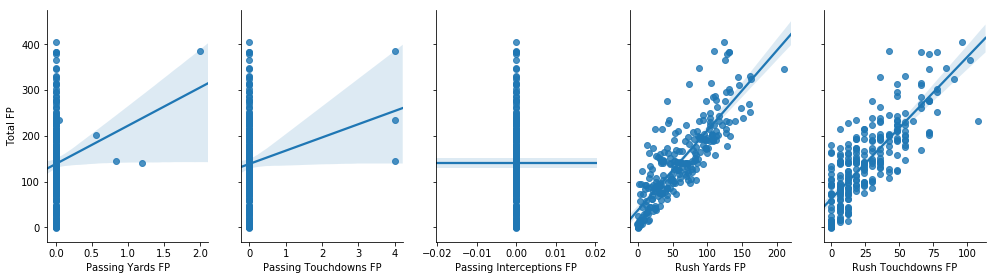

In [24]:
sns.pairplot(FP_Calc_RB2, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP'
                              , 'Rush Yards FP', 'Rush Touchdowns FP'],y_vars='Total FP', size=4, aspect =.7,kind='reg' )

In [25]:
FP_Calc_RB2.columns

Index(['Key', 'Player Name', 'Player Team', 'Position', 'Games Played',
       'Games Started', 'Season Age', 'Rec Receptions', 'Rec Red Zone Targets',
       'Rec Touchdowns', 'Rec Yards', 'Fumbles', 'Lost Fumbles',
       'Rush Attempts', 'Rush Avg Yards', 'Rush Red Zone Attempts',
       'Rush Scrambles', 'Rush Touchdowns', 'Rush Yards',
       'Passing Completion Pct', 'Passing Hurries', 'Passing Interceptions',
       'Passing Redzone Attempts', 'Passing Touchdowns', 'Passing Yards',
       'Field Goal Attempts', 'Field Goal Longest', 'Field Goal Made',
       'Field Goal Yards', 'Extra Pts Attempts', 'Extra Pts Made',
       'Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',
       'Rush Yards FP', 'Rush Touchdowns FP', 'Rec Yards FP',
       'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP',
       'Total FP'],
      dtype='object')

In [26]:
#FP_Calc_QB2 = FP_Calc_QB[FP_Calc_QB.'Games Played'] >= 13]]

#FP_Calc_QB =FP_Calc_DF3[FP_Calc_DF3.'Games Played' == '16']

FP_Calc_RB2= FP_Calc_RB2[FP_Calc_RB2['Games Played'] >= 13]

In [28]:
FP_Calc_RB2
#FP_Calc_RB2.set_index("Season", inplace = True) 

,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,Rec Touchdowns,...,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP
Season,,,,,,,,,,,,,,,,,,,,,
2012,a212c5d8-67f8-48b9-99be-2c121ee56366 2012 4809...,Lamar Miller,Dolphins,RB,13,1,21,6.0,1.0,0.0,...,0.00,0.0,-0.0,25.0,6.0,4.5,6.0,0.0,-0.0,41.50
2013,a212c5d8-67f8-48b9-99be-2c121ee56366 2013 4809...,Lamar Miller,Dolphins,RB,16,15,22,26.0,5.0,0.0,...,0.00,0.0,-0.0,70.9,12.0,17.0,26.0,0.0,-2.0,123.90
2014,a212c5d8-67f8-48b9-99be-2c121ee56366 2014 4809...,Lamar Miller,Dolphins,RB,16,16,23,38.0,8.0,1.0,...,0.00,0.0,-0.0,109.9,48.0,27.5,38.0,6.0,-6.0,223.40
2015,a212c5d8-67f8-48b9-99be-2c121ee56366 2015 4809...,Lamar Miller,Dolphins,RB,16,16,24,47.0,4.0,2.0,...,0.00,0.0,-0.0,87.2,48.0,39.7,47.0,12.0,-2.0,231.90
2016,a212c5d8-67f8-48b9-99be-2c121ee56366 2016 82d2...,Lamar Miller,Texans,RB,14,14,25,31.0,2.0,1.0,...,0.00,0.0,-0.0,107.3,30.0,18.8,31.0,6.0,-2.0,191.10
2017,a212c5d8-67f8-48b9-99be-2c121ee56366 2017 82d2...,Lamar Miller,Texans,RB,16,13,26,36.0,3.0,3.0,...,0.00,0.0,-0.0,88.8,18.0,32.7,36.0,18.0,-0.0,193.50
2018,a212c5d8-67f8-48b9-99be-2c121ee56366 2018 82d2...,Lamar Miller,Texans,RB,14,14,27,25.0,1.0,1.0,...,0.00,0.0,-0.0,97.3,30.0,16.3,25.0,6.0,-2.0,172.60
2012,4a38cda2-e92f-47f8-b324-0c34e09d83f2 2012 5fee...,Bilal Powell,Jets,RB,14,2,24,17.0,1.0,0.0,...,0.00,0.0,-0.0,43.7,24.0,14.0,17.0,0.0,-0.0,98.70
2013,4a38cda2-e92f-47f8-b324-0c34e09d83f2 2013 5fee...,Bilal Powell,Jets,RB,16,11,25,36.0,3.0,0.0,...,1.20,0.0,-0.0,69.7,6.0,27.2,36.0,0.0,-0.0,140.10


In [29]:
FP_Calc_RB2.head()

,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,Rec Touchdowns,...,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP
Season,,,,,,,,,,,,,,,,,,,,,
2012,a212c5d8-67f8-48b9-99be-2c121ee56366 2012 4809...,Lamar Miller,Dolphins,RB,13,1,21,6.0,1.0,0.0,...,0.0,0.0,-0.0,25.0,6.0,4.5,6.0,0.0,-0.0,41.5
2013,a212c5d8-67f8-48b9-99be-2c121ee56366 2013 4809...,Lamar Miller,Dolphins,RB,16,15,22,26.0,5.0,0.0,...,0.0,0.0,-0.0,70.9,12.0,17.0,26.0,0.0,-2.0,123.9
2014,a212c5d8-67f8-48b9-99be-2c121ee56366 2014 4809...,Lamar Miller,Dolphins,RB,16,16,23,38.0,8.0,1.0,...,0.0,0.0,-0.0,109.9,48.0,27.5,38.0,6.0,-6.0,223.4
2015,a212c5d8-67f8-48b9-99be-2c121ee56366 2015 4809...,Lamar Miller,Dolphins,RB,16,16,24,47.0,4.0,2.0,...,0.0,0.0,-0.0,87.2,48.0,39.7,47.0,12.0,-2.0,231.9
2016,a212c5d8-67f8-48b9-99be-2c121ee56366 2016 82d2...,Lamar Miller,Texans,RB,14,14,25,31.0,2.0,1.0,...,0.0,0.0,-0.0,107.3,30.0,18.8,31.0,6.0,-2.0,191.1


In [30]:
FP_Calc_RB2.columns

Index(['Key', 'Player Name', 'Player Team', 'Position', 'Games Played',
       'Games Started', 'Season Age', 'Rec Receptions', 'Rec Red Zone Targets',
       'Rec Touchdowns', 'Rec Yards', 'Fumbles', 'Lost Fumbles',
       'Rush Attempts', 'Rush Avg Yards', 'Rush Red Zone Attempts',
       'Rush Scrambles', 'Rush Touchdowns', 'Rush Yards',
       'Passing Completion Pct', 'Passing Hurries', 'Passing Interceptions',
       'Passing Redzone Attempts', 'Passing Touchdowns', 'Passing Yards',
       'Field Goal Attempts', 'Field Goal Longest', 'Field Goal Made',
       'Field Goal Yards', 'Extra Pts Attempts', 'Extra Pts Made',
       'Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',
       'Rush Yards FP', 'Rush Touchdowns FP', 'Rec Yards FP',
       'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP',
       'Total FP'],
      dtype='object')

In [91]:
# features_cols = [ 'Passing Completion Pct', 'Passing Hurries', 'Passing Interceptions',
#        'Passing Redzone Attempts', 'Passing Touchdowns', 'Passing Yards',, 'Rec Receptions', 'Rec Red Zone Targets',
#        'Rec Touchdowns', 'Rec Yards', 'Fumbles', 'Lost Fumbles',
#        'Rush Attempts', 'Rush Avg Yards', 'Rush Red Zone Attempts',
#        'Rush Scrambles', 'Rush Touchdowns', 'Rush Yards',]
#'Passing Completion Pct','Season Age'
#'Rec Yards FP'                 ,'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP'
# 'Rush Yards FP', 'Passing Completion Pct'

#features_cols = ['Passing Yards FP','Passing Touchdowns FP', 'Passing Interceptions FP','Rush Touchdowns FP',
#                 'Rec Yards FP' ,'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP',
#                 'Rush Yards FP','Rush Yards FP']


features_cols = ['Rush Touchdowns FP',
                'Rec Yards FP' ,'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP',
                'Rush Yards FP']

In [92]:
x = FP_Calc_RB2[features_cols]
x


,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Rush Yards FP
Season,,,,,,
2012,6.0,4.5,6.0,0.0,-0.0,25.0
2013,12.0,17.0,26.0,0.0,-2.0,70.9
2014,48.0,27.5,38.0,6.0,-6.0,109.9
2015,48.0,39.7,47.0,12.0,-2.0,87.2
2016,30.0,18.8,31.0,6.0,-2.0,107.3
2017,18.0,32.7,36.0,18.0,-0.0,88.8
2018,30.0,16.3,25.0,6.0,-2.0,97.3
2012,24.0,14.0,17.0,0.0,-0.0,43.7
2013,6.0,27.2,36.0,0.0,-0.0,69.7


In [93]:
target_cols = ['Total FP']

In [94]:
FP_Calc_RB2.head()

,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Receptions,Rec Red Zone Targets,Rec Touchdowns,...,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP
Season,,,,,,,,,,,,,,,,,,,,,
2012,a212c5d8-67f8-48b9-99be-2c121ee56366 2012 4809...,Lamar Miller,Dolphins,RB,13,1,21,6.0,1.0,0.0,...,0.0,0.0,-0.0,25.0,6.0,4.5,6.0,0.0,-0.0,41.5
2013,a212c5d8-67f8-48b9-99be-2c121ee56366 2013 4809...,Lamar Miller,Dolphins,RB,16,15,22,26.0,5.0,0.0,...,0.0,0.0,-0.0,70.9,12.0,17.0,26.0,0.0,-2.0,123.9
2014,a212c5d8-67f8-48b9-99be-2c121ee56366 2014 4809...,Lamar Miller,Dolphins,RB,16,16,23,38.0,8.0,1.0,...,0.0,0.0,-0.0,109.9,48.0,27.5,38.0,6.0,-6.0,223.4
2015,a212c5d8-67f8-48b9-99be-2c121ee56366 2015 4809...,Lamar Miller,Dolphins,RB,16,16,24,47.0,4.0,2.0,...,0.0,0.0,-0.0,87.2,48.0,39.7,47.0,12.0,-2.0,231.9
2016,a212c5d8-67f8-48b9-99be-2c121ee56366 2016 82d2...,Lamar Miller,Texans,RB,14,14,25,31.0,2.0,1.0,...,0.0,0.0,-0.0,107.3,30.0,18.8,31.0,6.0,-2.0,191.1


In [95]:
y = FP_Calc_RB2[target_cols]
y.head()

,Total FP
Season,
2012,41.5
2013,123.9
2014,223.4
2015,231.9
2016,191.1


In [97]:
FP_Calc_RB2.to_csv('Test.csv')

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train = x[x.index < 2018]
y_train = y[y.index < 2018]
x_test = x[x.index == 2018]
y_test = y[y.index == 2018]

In [100]:
print(x_train.shape),print(y_train.shape)

(199, 6)
(199, 1)


(None, None)

In [101]:
x_train.head()

,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Rush Yards FP
Season,,,,,,
2012,6.0,4.5,6.0,0.0,-0.0,25.0
2013,12.0,17.0,26.0,0.0,-2.0,70.9
2014,48.0,27.5,38.0,6.0,-6.0,109.9
2015,48.0,39.7,47.0,12.0,-2.0,87.2
2016,30.0,18.8,31.0,6.0,-2.0,107.3


In [102]:
print(x_test.shape),print(y_test.shape)

(65, 6)
(65, 1)


(None, None)

In [103]:
from sklearn.linear_model import LinearRegression

NameError: name 'statsmodels' is not defined

In [104]:
x_train = add_constant(x_train)
est = sm.OLS(y_train,x_train.astype(float)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Total FP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.037e+06
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:13:02   Log-Likelihood:                -70.327
No. Observations:                 199   AIC:                             154.7
Df Residuals:                     192   BIC:                             177.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0057      0.050     -0.114      0.909      -0.104       0.092
Rush Touchdowns FP     0.9995      0.002    521.276      0.000       0.996       1.003
Rec Yards FP           0.9940      0.005    195.196      0.000       0.984       1.004
Rec Receptions FP      1.0087      0.004    234.924      0.000       1.000       1.017
Rec Touchdowns FP      0.9955      0.004    234.002      0.000       0.987       1.004
Lost Fumbles FP        0.9859      0.014     70.692      0.000       0.958       1.013
Rush Yards FP          0.9992      0.001    932.896      0.000       0.997       1.001
==============================================================================
Omnibus:                      411.848   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211420.587
Skew:                          12.148   Prob(JB):                         0.00
Kurtosis:                     160.822   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'logit' is not defined

In [44]:
linreg = LinearRegression()
t=linreg.fit(x_train,y_train)

In [45]:
print(linreg.intercept_)

[39.44901183]


In [46]:
print(linreg.coef_)

[[ 0.00000000e+00  1.08348884e+01  1.00406959e+01  2.49800181e-15
   1.27631486e+00 -1.17597240e+00  1.14765040e+00]]


In [47]:
print(t.intercept_)

[39.44901183]


In [48]:
print(t.summary_)

AttributeError: 'LinearRegression' object has no attribute 'summary_'